In [3]:
import google.generativeai as genai
import os

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

model = genai.GenerativeModel('gemini-pro')
response = model.generate_content('Please tell me about yourself: ...')

print(response.text)


As an AI language model, I don't have a personal identity or life experiences like humans. I am designed to assist and provide information to the best of my knowledge and capabilities within the parameters of my training data.


In [5]:
prompt = """
    Given the proble:

    Find the number of non-isomorphic groups of order 48 and state which ones are non-abelian.

Write only the steps which will be required to solve this problem, with the equation involved if any.
"""
response = model.generate_content(prompt)
print(response.text)

1. **Factor 48 into its prime factors:** 48 = 2^4 * 3
2. **Determine the possible group orders for the subgroups:**
   - Order 1
   - Order 2
   - Order 3
   - Order 4
   - Order 6
   - Order 8
   - Order 12
   - Order 16
   - Order 24
   - Order 48
3. **Apply Sylow's Theorems:**
   - Sylow p-subgroup theorem: Determine the number of Sylow p-subgroups for each prime factor p of 48.
   - Sylow subgroup theorem: Determine the possible orders of the Sylow p-subgroups.
4. **Use the group order formula:** |G| = |Z(G)| * |G/Z(G)| to find the number of non-isomorphic groups of order 48.
5. **Identify the non-abelian groups:** Based on the group structure, determine which of the non-isomorphic groups are non-abelian.


In [5]:
from llama_index.llms.gemini import Gemini

resp = Gemini(model_name="models/gemini-pro").complete("Write a poem about a magic backpack")
print(resp)

**The Magic Backpack**

In a realm where dreams take flight,
There's a backpack with powers bright.
Its fabric shimmers, a vibrant hue,
A portal to wonders, both old and new.

With every step, it whispers low,
Unveiling secrets, making dreams grow.
Its pockets hold treasures beyond compare,
A universe of magic, beyond compare.

A book of spells, its pages unfold,
Unveiling wisdom, stories untold.
A wand of light, its power ablaze,
Igniting dreams, setting hearts ablaze.

A compass guides, through paths unknown,
Leading to adventures, where dreams are sown.
A telescope, its lens so clear,
Revealing stars, dispelling fear.

A paintbrush dances, colors bright,
Creating worlds, with every stroke of light.
A musical instrument, its notes so sweet,
Filling the air with melodies, a rhythmic treat.

But more than treasures, it holds within,
A spark of hope, where dreams begin.
It whispers courage, dispels the doubt,
Empowering hearts, making dreams sprout.

So let us embrace this magic pack,
A

In [1]:
import requests

app_id = "KWW3UE-KE799U2QKY"

response = requests.get(f"http://api.wolframalpha.com/v2/query?appid={app_id}&input=population%20of%20france")

In [3]:
response.text

"<?xml version='1.0' encoding='UTF-8'?>\n<queryresult success='true'\n    error='false'\n    xml:space='preserve'\n    numpods='8'\n    datatypes='City,Country'\n    timedout=''\n    timedoutpods=''\n    timing='2.62'\n    parsetiming='0.195'\n    parsetimedout='false'\n    recalculate=''\n    id='MSP1014918gc87150328d2ei0000597g7b65g8ba442d'\n    host='https://www6b3.wolframalpha.com'\n    server='13'\n    related='https://www6b3.wolframalpha.com/api/v1/relatedQueries.jsp?id=MSPa1015018gc87150328d2ei00005912h68gahdg2f3i4222294402565530544'\n    version='2.6'\n    inputstring='population of france'>\n <pod title='Input interpretation'\n     scanner='Identity'\n     id='Input'\n     position='100'\n     error='false'\n     numsubpods='1'>\n  <subpod title=''>\n   <img src='https://www6b3.wolframalpha.com/Calculate/MSP/MSP1015118gc87150328d2ei00003c62d9f06192b98i?MSPStoreType=image/gif&amp;s=13'\n       alt='France | population'\n       title='France | population'\n       width='174'\n  

In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Replace 'YOUR_APP_ID' with your actual Wolfram Alpha API key
app_id = 'KWW3UE-KE799U2QKY'


def graph_plot(query: str) -> str:
    '''
    function for plotting the graph for the given mathematical function or equation, in text format.

    Args:
        query: str - the query of mathematical function or equation, which needs to plotted.
    Returns:
        str - whether the plot is successfully plotted or not.
    '''
# URL for the Wolfram Alpha API
    url = f'http://api.wolframalpha.com/v2/query?input={query}&format=image,plaintext&output=JSON&appid={app_id}'

    # Send the request to the API
    response = requests.get(url)
    data = response.json()

    try:
        # Extract the image URL from the response
        pods = data['queryresult']['pods']
        image_url = None
        for pod in pods:
            if 'Plot' in pod['title']:
                subpods = pod['subpods']
                for subpod in subpods:
                    if 'img' in subpod:
                        image_url = subpod['img']['src']
                        break
                if image_url:
                    break

        # Check if an image URL was found
        if image_url:
            # Download the image
            image_response = requests.get(image_url)
            img = Image.open(BytesIO(image_response.content))

            # Display the image using Matplotlib
            plt.imshow(img)
            plt.axis('off')  # Hide the axes
            plt.show()
            return "Plot succesfully plotted"
        else:
            return "No plot found in the query result."
    except Exception as e:
        print(e)
        return "No plot found"


In [3]:
def show_steps(query: str) -> str:
    '''
    function for solving a mathematical expression or equation, and providing each steps for the solution.

    Args:
        query: str - the mathematical query, in the form of expression or equation which needs to be solved.
    
    Returns:
        str - solution with complete steps of solution
    '''
    url = f'http://api.wolframalpha.com/v2/query?input={query}&podstate=Result__Step-by-step+solution&format=plaintext&output=JSON&appid={app_id}'

    # Send the request to the API
    response = requests.get(url)
    data = response.json()

    # Extract the solution steps from the response
    message = ""
    steps = []
    pods = data['queryresult']['pods']
    for pod in pods:
        if 'Solution' in pod['title'] or 'Result' in pod['title']:
            subpods = pod['subpods']
            for subpod in subpods:
                if 'plaintext' in subpod:
                    steps.append(subpod['plaintext'])

    # Check if solution steps were found
    if steps:
        message += "Solution Steps:\n"
        for step in steps:
            message += step + "\n"
    else:
        message += "No solution steps found in the query result."
    
    return message


* graph tool
* woflram calculator tool
* multiple solutions 
* `feedback on user solution`
* `follow up`
* `taking exam`

In [4]:
from llama_index.llms.gemini import Gemini

llm = Gemini(model_name="models/gemini-pro")

In [5]:
from llama_index.core.tools import FunctionTool

graph_tool = FunctionTool.from_defaults(fn=graph_plot)
steps_tool = FunctionTool.from_defaults(fn=show_steps)

In [7]:
from llama_index.core.tools import QueryEngineTool, ToolMetadata

tool_metadata = ToolMetadata(name='graph_tool', description="Tool for creating a graph plot for a given equation or expression")
query_engine_tool = QueryEngineTool(query_engine=graph_tool, metadata=tool_metadata)

In [8]:
query_engine_tools = [
    QueryEngineTool(
        query_engine=graph_tool, 
        metadata=ToolMetadata(
            name="graph_plot", 
            description="Tool for creating a graph plot for a given equation or expression"
        )
    ), 
    QueryEngineTool(
        query_engine=steps_tool, 
        metadata=ToolMetadata(
            name='steps_tool', 
            description="tool for creating steps for the solution of the given expression or equation"
        )
    )
]

In [10]:
from llama_index.core.agent import ReActAgent

agent = ReActAgent.from_tools(
    query_engine_tools, 
    llm=llm, 
    verbose=True
)

In [12]:
agent.chat("Plot 4x - 3y = 2, and 2y + 3x = 7 and solve the equation ")

Thought: The current language of the user is: english. I need to use a tool to help me answer the question.
Action: graph_plot
Action Input: {'input': '4x - 3y = 2'}
Observation: Error: 'FunctionTool' object has no attribute 'query'
Thought: The current language of the user is: english. I need to use a tool to help me answer the question.
Action: graph_plot
Action Input: {'input': '2y + 3x = 7'}
Observation: Error: 'FunctionTool' object has no attribute 'query'
Thought: I cannot answer the question with the provided tools.
Answer: I'm sorry, I cannot plot the given equations or solve them using the tools I have access to.


AgentChatResponse(response="I'm sorry, I cannot plot the given equations or solve them using the tools I have access to.", sources=[ToolOutput(content="Error: 'FunctionTool' object has no attribute 'query'", tool_name='graph_plot', raw_input={'kwargs': {'input': '4x - 3y = 2'}}, raw_output=AttributeError("'FunctionTool' object has no attribute 'query'"), is_error=True), ToolOutput(content="Error: 'FunctionTool' object has no attribute 'query'", tool_name='graph_plot', raw_input={'kwargs': {'input': '2y + 3x = 7'}}, raw_output=AttributeError("'FunctionTool' object has no attribute 'query'"), is_error=True)], source_nodes=[], is_dummy_stream=False)

In [13]:
from llama_index.core.agent import AgentRunner

agent = AgentRunner.from_llm([graph_tool, steps_tool], llm=llm, verbose=True, 
                             description="""You are helpful AI Tutor for mathematics. You have to take the query from user,
                               analyze it and with the help of available tools, try to answer the query fully with detailed explaination. 
                               The raw response you will get from the tools, you will have to refine them into easily understandable steps.""")

Thought: The current language of the user is: english. I need to use a tool to help me answer the question.
Action: show_steps
Action Input: {'query': 'sin(x)^3 -cos(x) = 4'}
Observation: Solution Steps:
x≈2 (3.14159 n - (1.3834 + 0.542066 i) ), n element Z
x≈2 (3.14159 n - (1.3834 - 0.542066 i) ), n element Z
x≈2 (3.14159 n - (0.254314 + 0.658012 i) ), n element Z
x≈2 (3.14159 n - (0.254314 - 0.658012 i) ), n element Z
x≈2 (3.14159 n + (0.852319 - 0.519667 i) ), n element Z

Thought: The current language of the user is: english. I need to use a tool to help me answer the question.
Action: graph_plot
Action Input: {'query': 'sin(x)^3 -cos(x) = 4'}


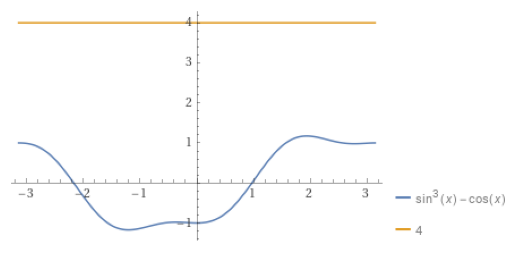

Observation: Plot succesfully plotted
Thought: I can answer without using any more tools. I'll use the user's language to answer
Answer: The solution to the equation sin(x)^3 -cos(x) = 4 are:
x≈2 (3.14159 n - (1.3834 + 0.542066 i) ), n element Z
x≈2 (3.14159 n - (1.3834 - 0.542066 i) ), n element Z
x≈2 (3.14159 n - (0.254314 + 0.658012 i) ), n element Z
x≈2 (3.14159 n - (0.254314 - 0.658012 i) ), n element Z
x≈2 (3.14159 n + (0.852319 - 0.519667 i) ), n element Z

The plot of the function sin(x)^3 -cos(x) - 4 is also attached.


Response(response='The solution to the equation sin(x)^3 -cos(x) = 4 are:\nx≈2 (3.14159 n - (1.3834 + 0.542066 i) ), n element Z\nx≈2 (3.14159 n - (1.3834 - 0.542066 i) ), n element Z\nx≈2 (3.14159 n - (0.254314 + 0.658012 i) ), n element Z\nx≈2 (3.14159 n - (0.254314 - 0.658012 i) ), n element Z\nx≈2 (3.14159 n + (0.852319 - 0.519667 i) ), n element Z\n\nThe plot of the function sin(x)^3 -cos(x) - 4 is also attached.', source_nodes=[], metadata=None)

In [14]:
agent.query("What is the solution of sin(x)^3 -cos(x) = 4, along with plot. Explain your approach and each step")